Test case = execute long.osx 0 small.osx 10 longCPU.osx 40

In [1]:
class thread:
    def __init__(self, name, arrival_time):
        self.name = name
        self.arrival_time = arrival_time
        self.start_time = None
        self.end_time = 0
        self.waiting_time = 0
        self.response_time = 0
        self.turnaround_time = 0

    def __str__(self):
        return f"Thread {self.name} (Arrival Time: {self.arrival_time}, End Time: {self.end_time})"

    def __repr__(self):
        return self.__str__()
    
    def pid(self) -> int:
        return int(self.name)
    
    def print_metrics(self):
        print(f"Thread {self.name}:")
        print(f"Waiting Time: {self.waiting_time}")
        print(f"Response Time: {self.response_time}")
        print(f"Turnaround Time: {self.turnaround_time}")
        print()

In [4]:
first = thread(1, 0)
second = thread(4, 12)
third = thread(5, 35)

quantum_ratio = 2
gantt = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 5, 1, 4, 4, 4, 4, 5, 5, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 1, 5, 5, 1, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 1, 5, 5, 1, 4, 4, 4, 4, 4, 4, 4, 4, 5, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
started = []
finished = {}

def find_last(arr, number):
    for i in range(len(arr) - 1, -1, -1):
        if arr[i] == number:
            return i
    return -1

finished[first.pid()] = find_last(gantt, first.pid())
finished[second.pid()] = find_last(gantt, second.pid())
finished[third.pid()] = find_last(gantt, third.pid())

for i in range(len(gantt)):
    '''Need to record the start and end times of each thread in the gantt chart
    and then calculate the waiting time, response time, and turnaround time for each pid'''
    if gantt[i] == first.pid():
        first.end_time = i
        # calcualte waiting
        if first.pid() not in started:
            first.response_time = i - first.arrival_time
            started.append(first.pid())
        if i >= second.arrival_time and i < finished[second.pid()]:
            second.waiting_time += 1
        if i >= third.arrival_time and i < finished[third.pid()]:
            third.waiting_time += 1
            
    if gantt[i] == second.pid():
        second.end_time = i
        if second.pid() not in started:
            second.response_time = i - second.arrival_time
            started.append(second.pid())
        if i >= first.arrival_time and i < finished[first.pid()]:
            first.waiting_time += 1
        if i >= third.arrival_time and i < finished[third.pid()]:
            third.waiting_time += 1
            
    if gantt[i] == third.pid():
        third.end_time = i
        if third.pid() not in started:
            third.response_time = i - third.arrival_time-1
            started.append(third.pid())
        if i >= first.arrival_time and i < finished[first.pid()]:
            first.waiting_time += 1
        if i >= second.arrival_time and i < finished[second.pid()]:
            second.waiting_time += 1
        
first.turnaround_time = first.end_time - first.arrival_time
second.turnaround_time = second.end_time - second.arrival_time
third.turnaround_time = third.end_time - third.arrival_time

In [5]:
first.print_metrics()
second.print_metrics()
third.print_metrics()

Thread 1:
Waiting Time: 175
Response Time: 0
Turnaround Time: 224

Thread 4:
Waiting Time: 35
Response Time: -1
Turnaround Time: 196

Thread 5:
Waiting Time: 36
Response Time: -11
Turnaround Time: 44



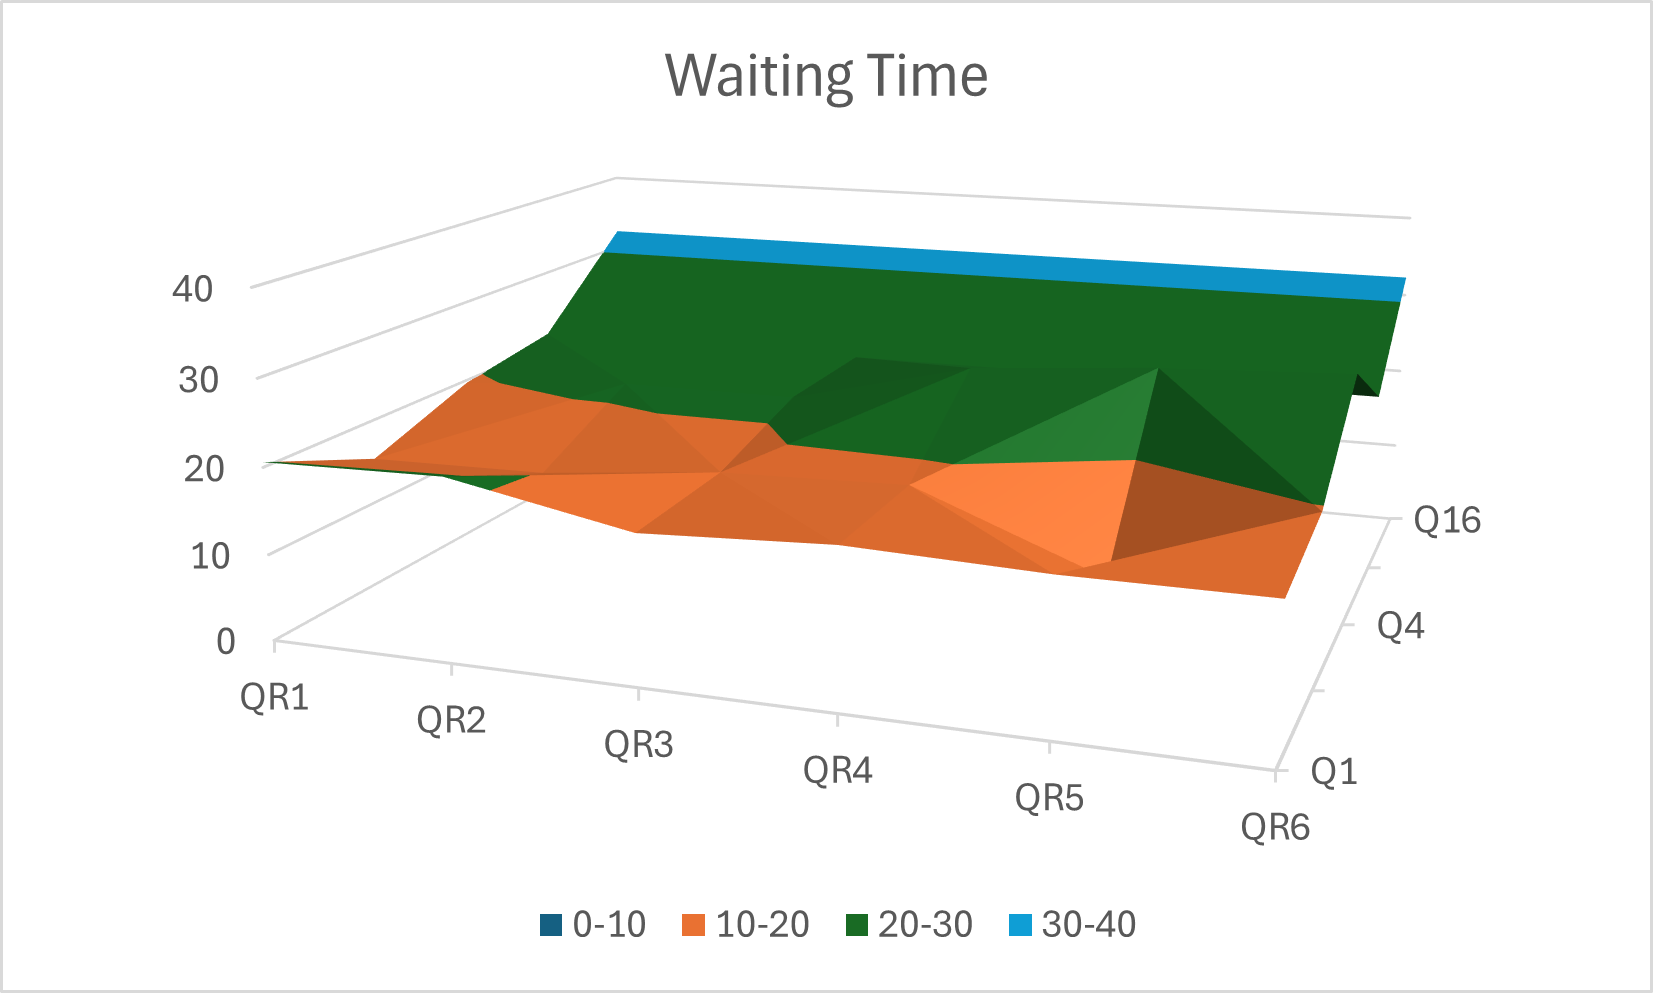

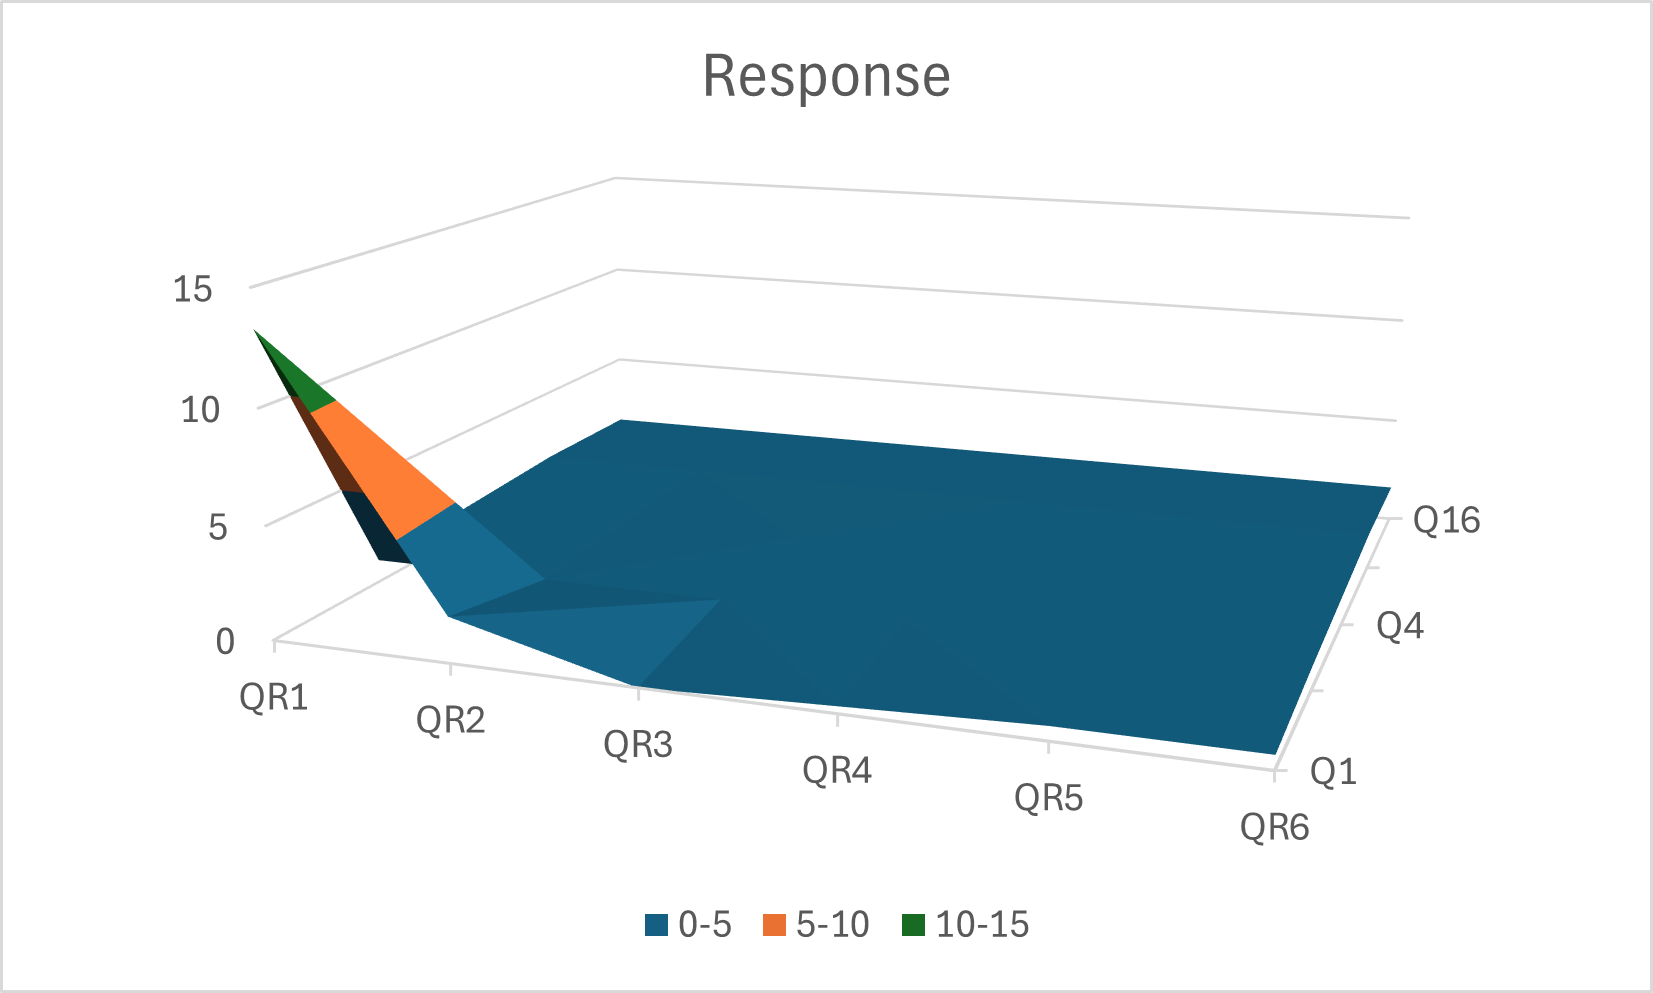

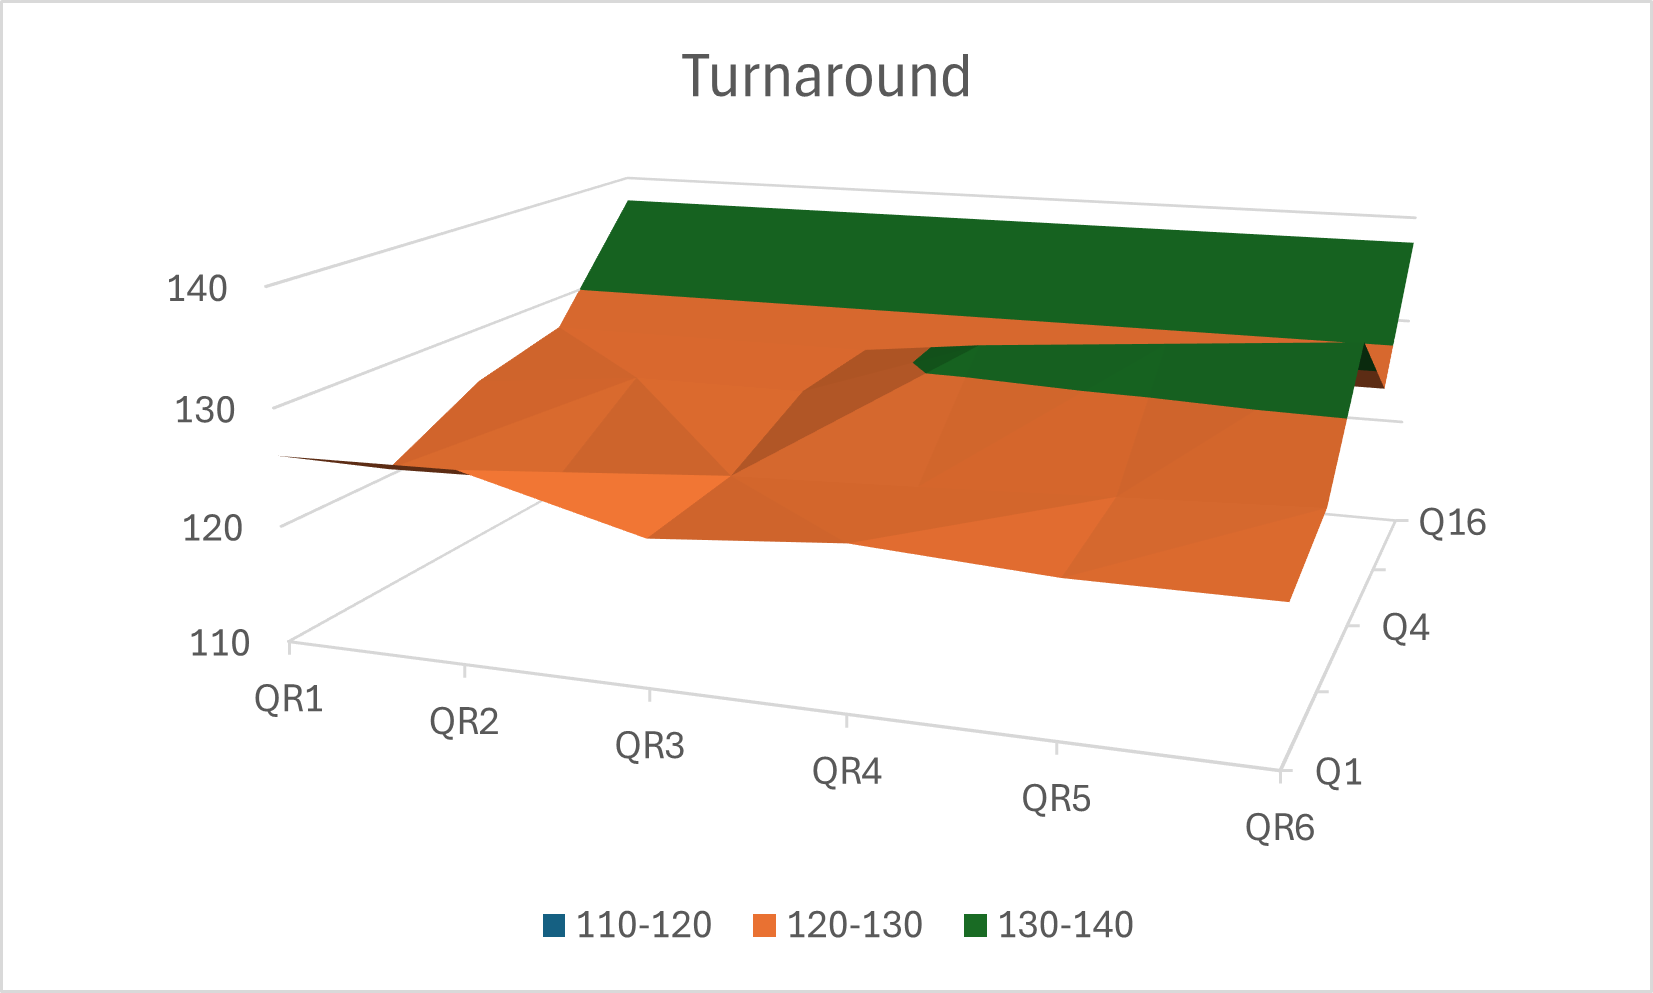